In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import logistic_regression as logreg
import knn 
import common as com
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset = pd.read_csv("pokemon_alopez247.csv", na_values = "?")

In [3]:
print(dataset.sample(5))

     Number      Name  Type_1  Type_2  Total   HP  Attack  Defense  Sp_Atk  \
319     320   Wailmer   Water     NaN    400  130      70       35      70   
458     459    Snover   Grass     Ice    334   60      62       50      62   
338     339  Barboach   Water  Ground    288   50      48       43      46   
392     393    Piplup   Water     NaN    314   53      51       53      61   
263     264   Linoone  Normal     NaN    420   78      70       61      50   

     Sp_Def  ...  Color  hasGender  Pr_Male Egg_Group_1  Egg_Group_2  \
319      35  ...   Blue       True    0.500       Field      Water_2   
458      60  ...  White       True    0.500     Monster        Grass   
338      41  ...   Grey       True    0.500     Water_2          NaN   
392      56  ...   Blue       True    0.875     Water_1        Field   
263      61  ...  White       True    0.500       Field          NaN   

     hasMegaEvolution Height_m Weight_kg  Catch_Rate        Body_Style  
319             False    

In [4]:
dataset.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [5]:
dataset.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [6]:
dataset.count()

Number              721
Name                721
Type_1              721
Type_2              350
Total               721
HP                  721
Attack              721
Defense             721
Sp_Atk              721
Sp_Def              721
Speed               721
Generation          721
isLegendary         721
Color               721
hasGender           721
Pr_Male             644
Egg_Group_1         721
Egg_Group_2         191
hasMegaEvolution    721
Height_m            721
Weight_kg           721
Catch_Rate          721
Body_Style          721
dtype: int64

In [7]:
dataset.describe

<bound method NDFrame.describe of      Number        Name    Type_1  Type_2  Total   HP  Attack  Defense  \
0         1   Bulbasaur     Grass  Poison    318   45      49       49   
1         2     Ivysaur     Grass  Poison    405   60      62       63   
2         3    Venusaur     Grass  Poison    525   80      82       83   
3         4  Charmander      Fire     NaN    309   39      52       43   
4         5  Charmeleon      Fire     NaN    405   58      64       58   
5         6   Charizard      Fire  Flying    534   78      84       78   
6         7    Squirtle     Water     NaN    314   44      48       65   
7         8   Wartortle     Water     NaN    405   59      63       80   
8         9   Blastoise     Water     NaN    530   79      83      100   
9        10    Caterpie       Bug     NaN    195   45      30       35   
10       11     Metapod       Bug     NaN    205   50      20       55   
11       12  Butterfree       Bug  Flying    395   60      45       50   
12  

In [8]:
dataset.corr()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Number,1.000000,0.160370,0.107512,0.138104,0.121401,0.120161,0.111822,0.028156,0.983329,0.135022,-0.100328,-0.013414,-0.117981,-0.009710,0.087309,-0.074931
Total,0.160370,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.481837,-0.385978,0.113564,0.228503,0.526813,0.535966,-0.738280
HP,0.107512,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,0.258926,-0.155031,-0.066704,0.093708,0.442872,0.431320,-0.478725
Attack,0.138104,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.302786,-0.196892,0.213882,0.203840,0.408590,0.469395,-0.525106
Defense,0.121401,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.274446,-0.269466,0.063899,0.122666,0.354205,0.476983,-0.436558
Sp_Atk,0.120161,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.409739,-0.336579,0.105893,0.175581,0.330579,0.285048,-0.539114
Sp_Def,0.111822,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.360215,-0.337265,0.017941,0.149796,0.313196,0.328645,-0.513014
Speed,0.028156,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.286082,-0.216964,0.070098,0.147844,0.224617,0.108637,-0.410557
Generation,0.983329,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.071875,-0.029916,0.010912,-0.125374,-0.051304,0.034003,-0.025227
isLegendary,0.135022,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.071875,1.000000,-0.644714,0.095428,0.047955,0.326323,0.425219,-0.319302


C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


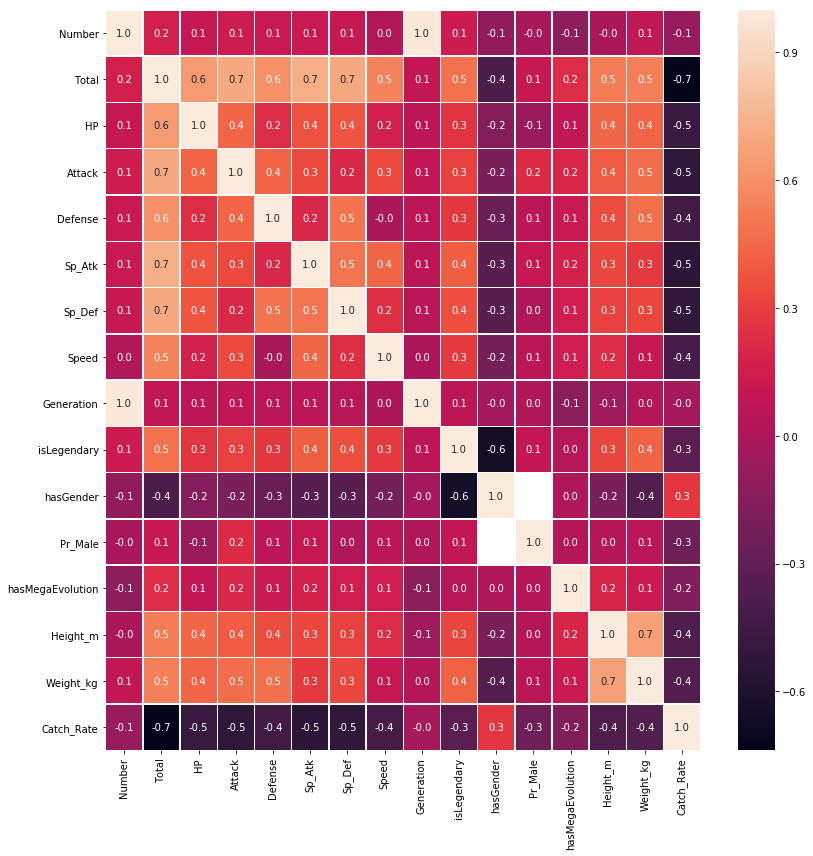

In [9]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [7]:
dataset.Type_1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [8]:
dataset.Type_2.unique()

array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [9]:
dataset.Color.unique()

array(['Green', 'Red', 'Blue', 'White', 'Brown', 'Yellow', 'Purple',
       'Pink', 'Grey', 'Black'], dtype=object)

In [10]:
dataset.Body_Style.unique()

array(['quadruped', 'bipedal_tailed', 'insectoid', 'serpentine_body',
       'four_wings', 'two_wings', 'bipedal_tailless', 'head_legs',
       'head_base', 'multiple_bodies', 'several_limbs', 'head_arms',
       'with_fins', 'head_only'], dtype=object)

C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


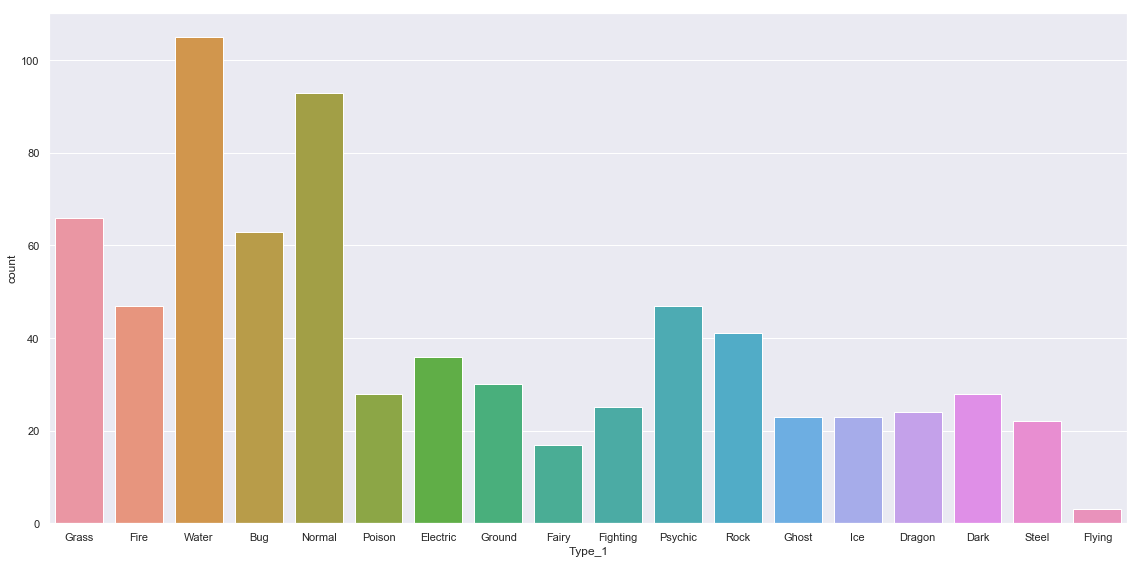

In [11]:
fig= plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Type_1", data=dataset)
plt.savefig('Type1.png')

C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


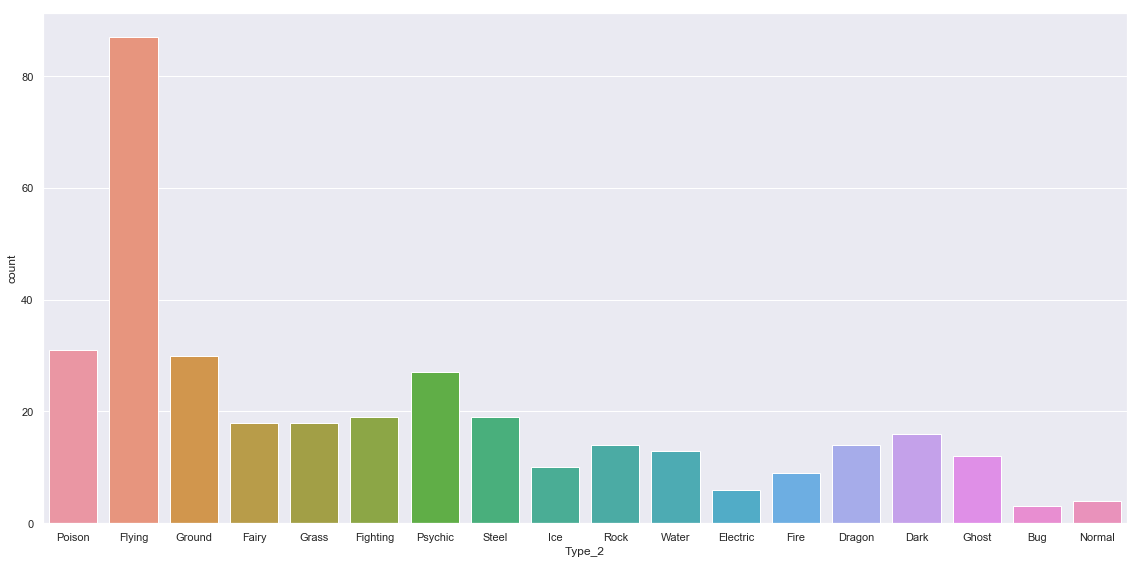

In [15]:
fig= plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Type_2", data=dataset)
plt.savefig('Type2.png')

C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


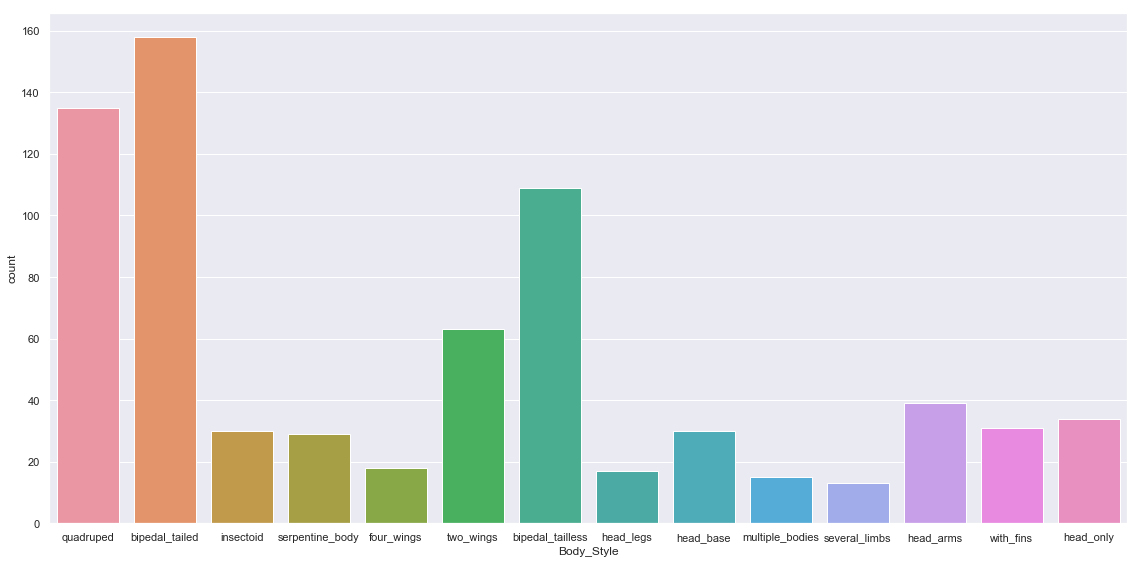

In [16]:
fig= plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Body_Style", data=dataset)
plt.savefig('Body_Style.png')

C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


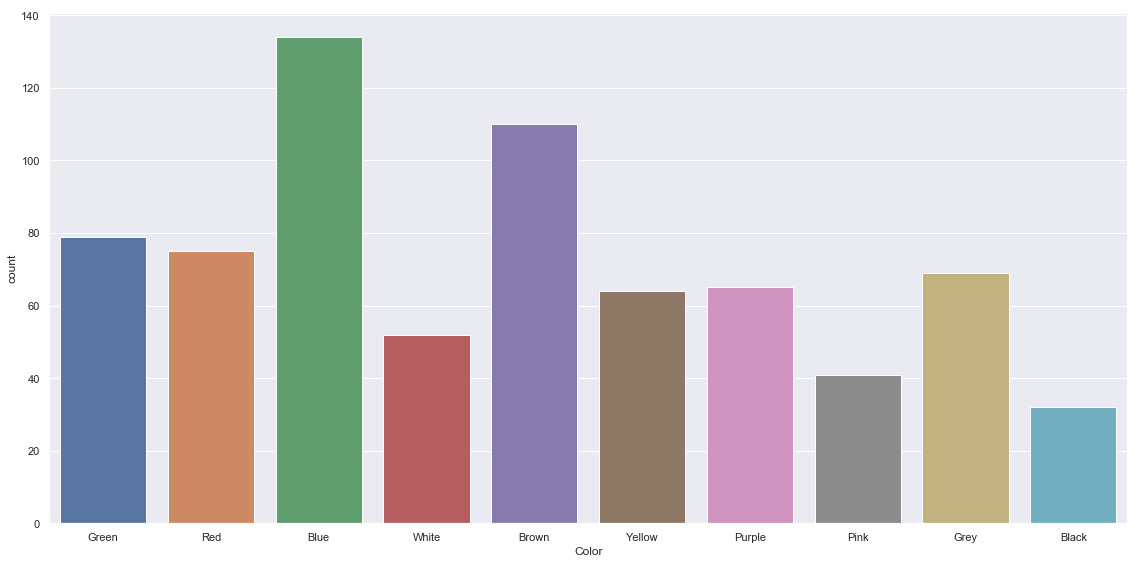

In [17]:
fig= plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Color", data=dataset)
plt.savefig('Color.png')

Todos os tipos são utilizados tanto como primários como secundários , o tipo primário predominante é o tipo água e o menos frequente é voador , já no segundo tipo voador é o mais comum e inseto o menos . 

In [4]:
obj_df = dataset.select_dtypes(include = ['object']).copy()
obj_df.head()

,Name,Type_1,Type_2,Color,Egg_Group_1,Egg_Group_2,Body_Style
0,Bulbasaur,Grass,Poison,Green,Monster,Grass,quadruped
1,Ivysaur,Grass,Poison,Green,Monster,Grass,quadruped
2,Venusaur,Grass,Poison,Green,Monster,Grass,quadruped
3,Charmander,Fire,NaN,Red,Monster,Dragon,bipedal_tailed
4,Charmeleon,Fire,NaN,Red,Monster,Dragon,bipedal_tailed


In [5]:
obj_df[obj_df.isnull().any(axis=1)]

,Name,Type_1,Type_2,Color,Egg_Group_1,Egg_Group_2,Body_Style
3,Charmander,Fire,NaN,Red,Monster,Dragon,bipedal_tailed
4,Charmeleon,Fire,NaN,Red,Monster,Dragon,bipedal_tailed
6,Squirtle,Water,NaN,Blue,Monster,Water_1,bipedal_tailed
7,Wartortle,Water,NaN,Blue,Monster,Water_1,bipedal_tailed
8,Blastoise,Water,NaN,Blue,Monster,Water_1,bipedal_tailed
9,Caterpie,Bug,NaN,Green,Bug,NaN,insectoid
10,Metapod,Bug,NaN,Green,Bug,NaN,serpentine_body
11,Butterfree,Bug,Flying,White,Bug,NaN,four_wings
12,Weedle,Bug,Poison,Brown,Bug,NaN,serpentine_body
13,Kakuna,Bug,Poison,Yellow,Bug,NaN,serpentine_body


In [6]:
dummiesEntradas = pd.get_dummies(obj_df, columns = ["Body_Style","Color"])

In [7]:
dummmiesSaida = pd.get_dummies(obj_df,columns = ["Type_1"])

In [8]:
dummiesEntradas = dummiesEntradas.drop(["Name","Type_2","Type_1","Egg_Group_1","Egg_Group_2"],axis=1)

In [9]:
dummmiesSaida = dummmiesSaida.drop(["Name","Type_2","Color","Egg_Group_1","Egg_Group_2","Body_Style"],axis=1)

In [10]:
dummiesEntradas.sample(5)

,Body_Style_bipedal_tailed,Body_Style_bipedal_tailless,Body_Style_four_wings,Body_Style_head_arms,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,...,Color_Black,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow
204,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
475,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
347,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
608,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
dummmiesSaida.sample(5)

,Type_1_Bug,Type_1_Dark,Type_1_Dragon,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,Type_1_Fire,Type_1_Flying,Type_1_Ghost,Type_1_Grass,Type_1_Ground,Type_1_Ice,Type_1_Normal,Type_1_Poison,Type_1_Psychic,Type_1_Rock,Type_1_Steel,Type_1_Water
489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Problema Classificando em Lendário

In [12]:
data1 = dataset.loc[:,["Number","Total","isLegendary"]]
data1.sample(10)

,Number,Total,isLegendary
546,547,480,False
338,339,288,False
664,665,213,False
4,5,405,False
198,199,490,False
584,585,335,False
413,414,424,False
12,13,195,False
530,531,445,False
113,114,435,False


C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


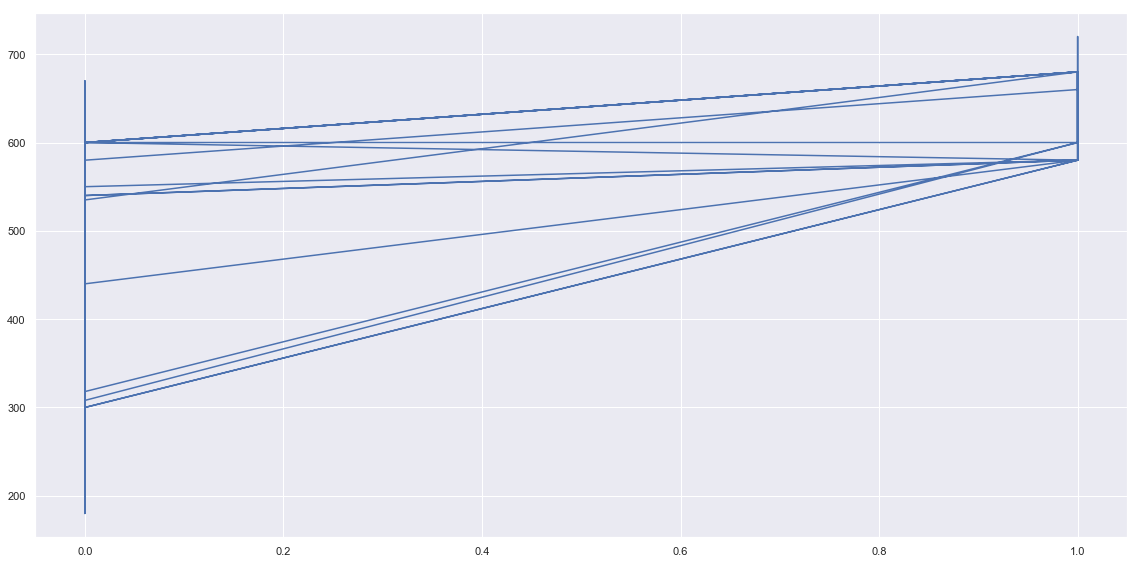

In [25]:
fig= plt.figure(figsize=(16,8))
plt.plot(data1.loc[:,'isLegendary'],data1.loc[:,'Total'])

plt.show()

Percebemos uma clara relação entre os status e verificar se um pokémon é ou não lendário, no entanto temos alguns dados que podem nos confundir 

In [13]:
#Divisão entrada e saída 

x = dataset.loc[:,["Number","HP", "Attack", "Defense",
       "Sp_Atk", "Sp_Def", "Speed"]].values

y = dataset.loc[:,"isLegendary"].values

train_ratio = 0.5
validation_ratio = 0.5

print("Número de padrões: %d" % x.shape[0])
print("Número de atributos: %d" % x.shape[1])
print("Número de classes: %d" % np.unique(y).shape[0])

Número de padrões: 721
Número de atributos: 7
Número de classes: 2


In [14]:
#Divisão treino/teste
np.random.seed(12345)

number_train = int(np.ceil(train_ratio*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 362
Número de padrões de teste: 359


In [15]:
#divisão validação e treinamento
number_validation = int(np.ceil(validation_ratio*(x_train.shape[0])))
number_train_validation = x_train.shape[0] - number_validation

random_index = np.random.permutation(x_train.shape[0])
train_index = random_index[:number_train_validation+1]
validation_index = random_index[number_train_validation+1:number_train_validation+number_validation+1]

x_train_validation, x_validation = x_train[train_index], x_train[validation_index]
y_train_validation, y_validation = y_train[train_index], y_train[validation_index]

print("Conjunto de treinamento: %d amostras" % y_train_validation.shape[0])
print("Conjunto de validação: %d amostras" % y_validation.shape[0])

Conjunto de treinamento: 182 amostras
Conjunto de validação: 180 amostras


In [16]:
#one_hot encoding
y_train_encoding = np.zeros((y_train.shape[0], max(y)+1))
for i in range(y_train_encoding.shape[0]):
    y_train_encoding[i,y_train[i]] = 1
y_train_validation_encoding = np.zeros((y_train_validation.shape[0], max(y)+1))
for i in range(y_train_validation_encoding.shape[0]):
    y_train_validation_encoding[i,y_train_validation[i]] = 1
y_validation_encoding = np.zeros((y_validation.shape[0], max(y)+1))
for i in range(y_validation_encoding.shape[0]):
    y_validation_encoding[i,y_validation[i]] = 1
y_test_encoding = np.zeros((y_test.shape[0], max(y)+1))
for i in range(y_test_encoding.shape[0]):
    y_test_encoding[i,y_test[i]] = 1

In [17]:
x_train.shape

(362, 7)

In [18]:
y_train.shape

(362,)

In [19]:
x_validation.shape

(180, 7)

In [20]:
y_validation.shape

(180,)

In [21]:
print("[LogisticRegression] Selecionando modelos...")

num_epochs = 2000
grid_search = np.logspace(-6, 0, 25) # alpha
validation_list = []
for i in range(grid_search.shape[0]):
    alpha = grid_search[i]
    
    model_logreg = logreg.gd(x=x_train_validation, y=y_train_validation_encoding,
                              alpha=alpha, num_epochs=num_epochs, compute_loss=False)
    #print(x_validation.shape)
    pred = np.argmax(logreg.predict(model_logreg['w'], x_validation), axis=1)
    wrong_index_validation = y_validation != pred
    validation_list.append(np.mean(wrong_index_validation))
   
best_alpha = grid_search[np.argmin(validation_list)] 

print("[LogisticRegression] Melhor modelo encontrado: alpha=%.2e" % (best_alpha))

[LogisticRegression] Selecionando modelos...


C:\Users\Bruno\Documents\machine-learning\Trabalho Final\logistic_regression.py:14: RuntimeWarning: invalid value encountered in true_divide
  return out / np.sum(out, axis=1)[:,None]


[LogisticRegression] Melhor modelo encontrado: alpha=1.00e-06


[LogisticRegression] Treinando modelo...


C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


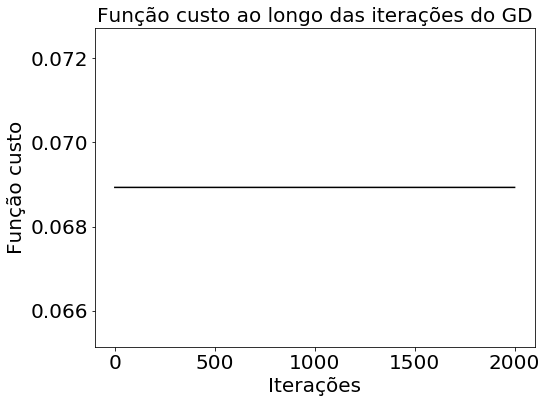

[LogisticRegression] Avaliando modelo...
[LogisticRegression] Taxa de erro no teste: 7.80%


In [22]:
print("[LogisticRegression] Treinando modelo...")
model_logreg = logreg.gd(x=x_train, y=y_train_encoding, alpha=best_alpha, num_epochs=num_epochs, compute_loss=True)

com.plot_loss_path(model_logreg['loss_history'], 'Função custo ao longo das iterações do GD')

print("[LogisticRegression] Avaliando modelo...")
pred_logreg = np.argmax(logreg.predict(model_logreg['w'], x_test), axis=1)

wrong_index_test_logreg = pred_logreg != y_test
print("[LogisticRegression] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_logreg)))

In [23]:
label_names = np.unique(dataset.isLegendary)
print(label_names)

[False  True]


Confusion matrix - Logistc Regression
[[331   0]
 [ 28   0]]


C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


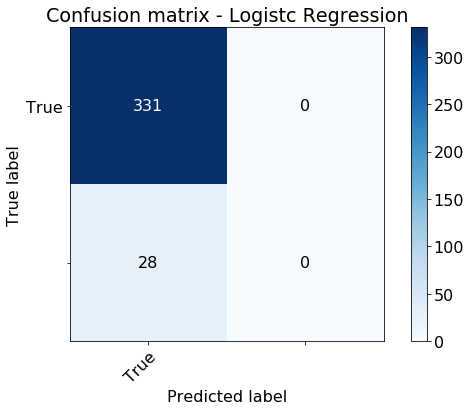

In [24]:
com.plot_confusion_matrix(y_test, y_pred=pred_logreg, classes=label_names,
                          title="Confusion matrix - Logistc Regression")
plt.show()

In [25]:
print("[KNN] Selecionando modelos...")

grid_search = np.meshgrid(np.arange(1, 26, 2), # k
                          ['euclidean', 'manhattan', 'mahalanobis']) # distance metric
validation_list = []
validation_list_index = []
for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        k = grid_search[0][i,j]
        distance_metric = grid_search[1][i,j]   
        
        wrong_index_validation = y_validation != knn.predict_class(x=x_train_validation, y=y_train_validation,
                                                                   x_new=x_validation,
                                                                   k=k, distance_metric=distance_metric)
        validation_list.append(np.mean(wrong_index_validation))
        validation_list_index.append((i,j))
   
best_i, best_j = validation_list_index[np.argmin(validation_list)]   
best_k = grid_search[0][best_i, best_j]
best_distance_metric = grid_search[1][best_i, best_j]

print("[KNN] Melhor modelo encontrado: K=%d, 'distance_metric'=%s" % (best_k, best_distance_metric))

[KNN] Selecionando modelos...
[KNN] Melhor modelo encontrado: K=3, 'distance_metric'=euclidean


In [26]:
print("[KNN] Avaliando modelo...")
pred_knn = knn.predict_class(x_train, y_train, x_test, k=best_k, distance_metric=best_distance_metric)

wrong_index_test_knn = pred_knn != y_test
print("[KNN] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_knn)))

[KNN] Avaliando modelo...
[KNN] Taxa de erro no teste: 5.57%


In [27]:
print("[DecisionTree] Selecionando modelos...")

grid_search = np.meshgrid(['gini', 'entropy'], # criterion
                          np.arange(2, 16, 1), # max_depth
                          np.arange(1, 21, 2)) # min_samples_leaf
validation_list = []
validation_list_index = []
for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        for k in range(grid_search[2].shape[2]):
            criterion = grid_search[0][i,j,k]
            max_depth = grid_search[1][i,j,k]   
            min_samples_leaf = grid_search[2][i,j,k]   

            model_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                                min_samples_leaf=min_samples_leaf,
                                                presort=True, random_state=1)
            model_tree.fit(x_train_validation, y_train_validation)
            
            wrong_index_validation = y_validation != model_tree.predict(x_validation)
            validation_list.append(np.mean(wrong_index_validation))
            validation_list_index.append((i,j,k))
   
best_i, best_j, best_k = validation_list_index[np.argmin(validation_list)]   
best_criterion = grid_search[0][best_i, best_j, best_k]
best_max_depth = grid_search[1][best_i, best_j, best_k]
best_min_samples_leaf = grid_search[2][best_i, best_j, best_k]

print("[DecisionTree] Melhor modelo encontrado: 'criterion'=%s, max_depth=%d, min_samples_leaf=%d" 
      % (best_criterion, best_max_depth, best_min_samples_leaf))

[DecisionTree] Selecionando modelos...
[DecisionTree] Melhor modelo encontrado: 'criterion'=gini, max_depth=2, min_samples_leaf=1


In [28]:
print("[DecisionTree] Treinando modelo...")
model_tree = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, 
                                    min_samples_leaf=best_min_samples_leaf,
                                    presort=True, random_state=1)

model_tree.fit(x_train, y_train)

print("[DecisionTree] Avaliando modelo...")
pred_tree = model_tree.predict(x_test)

wrong_index_test_tree = pred_tree != y_test
print("[DecisionTree] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_tree)))

[DecisionTree] Treinando modelo...
[DecisionTree] Avaliando modelo...
[DecisionTree] Taxa de erro no teste: 6.69%


Confusion matrix - KNN
[[329   2]
 [ 18  10]]


C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


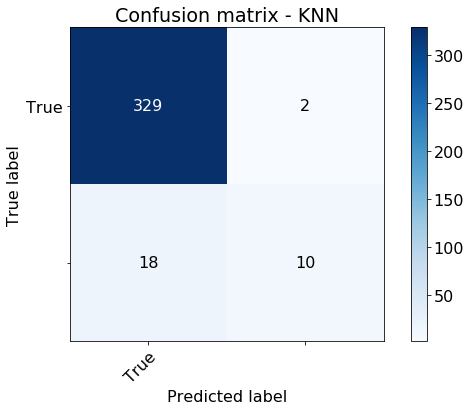

In [29]:
com.plot_confusion_matrix(y_test, y_pred=pred_knn, classes=label_names,
                          title="Confusion matrix - KNN")
plt.show()

Confusion matrix - Decision Tree
[[330   1]
 [ 23   5]]


C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


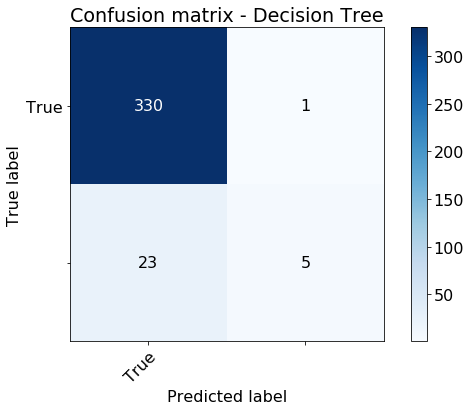

In [30]:
com.plot_confusion_matrix(y_test, y_pred=pred_tree, classes=label_names,
                          title="Confusion matrix - Decision Tree")
plt.show()

# Predição do Tipo do Pokémon baseado nas suas características

In [28]:
#Divisão entrada e saída 

x = dummiesEntradas.values

y_1 = dataset.loc[:,"Type_1"].values
label_names = np.unique(y_1)
y = np.zeros(y_1.shape, dtype=int)
for k, k_label in enumerate(label_names):
    y[y_1 == k_label] = k

train_ratio = 0.6
validation_ratio = 0.4

print("Número de padrões: %d" % x.shape[0])
print("Número de atributos: %d" % x.shape[1])
print("Número de classes: %d" % np.unique(y_1).shape[0])
#print(y)

Número de padrões: 721
Número de atributos: 24
Número de classes: 18


In [29]:
y.shape

(721,)

In [30]:
x.shape

(721, 24)

In [31]:
np.random.seed(12345)

number_train = int(np.ceil(train_ratio*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 434
Número de padrões de teste: 287


In [32]:
number_validation = int(np.ceil(validation_ratio*(x_train.shape[0])))
number_train_validation = x_train.shape[0] - number_validation

random_index = np.random.permutation(x_train.shape[0])
train_index = random_index[:number_train_validation+1]
validation_index = random_index[number_train_validation+1:number_train_validation+number_validation+1]

x_train_validation, x_validation = x_train[train_index], x_train[validation_index]
y_train_validation, y_validation = y_train[train_index], y_train[validation_index]

print("Conjunto de treinamento: %d amostras" % y_train_validation.shape[0])
print("Conjunto de validação: %d amostras" % y_validation.shape[0])

Conjunto de treinamento: 261 amostras
Conjunto de validação: 173 amostras


In [16]:
y_train_validation

array([13, 14, 14, 10,  1, 10, 17, 10,  4, 13, 13, 13,  1, 15, 11,  5,  2,
        0,  8,  5, 12, 12, 16,  6, 12,  2, 16,  3,  9, 10,  3, 13, 12, 14,
        0,  6, 17,  9, 16, 15, 12,  9, 17, 11, 13,  1,  1,  0, 14, 12, 14,
       14,  6, 12,  6,  3, 11, 13,  0, 17, 15, 17,  0,  9, 17, 12, 15,  3,
       17,  3,  3, 17,  2,  1, 12, 12, 12,  1,  0, 10, 10, 14,  5,  6,  9,
       12, 17,  2,  3, 17, 17, 11,  3,  0, 12,  2,  5, 12,  6, 13,  9,  9,
        3,  9, 13, 14,  8,  9,  0, 16,  9,  6, 17,  0, 17, 15, 12, 12,  6,
       17,  0, 12, 17, 12,  0, 12, 17,  4, 12, 16,  7,  8,  9,  9, 17, 10,
        5, 10,  0, 10,  9,  6,  9,  6, 10, 13,  9, 15,  8, 14, 17,  9,  5,
        9,  6,  5,  3, 17, 17,  8, 10, 14,  5, 16,  0,  0, 17, 14,  1, 12,
       12,  2,  2,  6, 17,  9,  0,  0,  3, 16,  3, 11, 15, 12, 12, 12, 17,
        1, 16, 10, 14,  5, 17, 17,  5, 17,  0, 17,  0, 13, 17, 17,  4,  0,
       12, 15, 10, 12, 17, 12, 16, 17, 17, 17, 11,  0,  0, 13, 17,  3,  3,
        9,  0,  8, 15, 15

In [17]:
x_train_validation

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [33]:
y_train_encoding = np.zeros((y_train.shape[0], max(y)+1))
for i in range(y_train_encoding.shape[0]):
    y_train_encoding[i,y_train[i]] = 1
y_train_validation_encoding = np.zeros((y_train_validation.shape[0], max(y)+1))
for i in range(y_train_validation_encoding.shape[0]):
    y_train_validation_encoding[i,y_train_validation[i]] = 1
y_validation_encoding = np.zeros((y_validation.shape[0], max(y)+1))
for i in range(y_validation_encoding.shape[0]):
    y_validation_encoding[i,y_validation[i]] = 1
y_test_encoding = np.zeros((y_test.shape[0], max(y)+1))
for i in range(y_test_encoding.shape[0]):
    y_test_encoding[i,y_test[i]] = 1

In [19]:
y_train_encoding

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
print("[DecisionTree] Selecionando modelos...")

grid_search = np.meshgrid(['gini', 'entropy'], # criterion
                          np.arange(2, 16, 1), # max_depth
                          np.arange(1, 21, 2)) # min_samples_leaf
validation_list = []
validation_list_index = []
for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        for k in range(grid_search[2].shape[2]):
            criterion = grid_search[0][i,j,k]
            max_depth = grid_search[1][i,j,k]   
            min_samples_leaf = grid_search[2][i,j,k]   

            model_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                                min_samples_leaf=min_samples_leaf,
                                                presort=True, random_state=1)
            model_tree.fit(x_train_validation, y_train_validation)
            
            wrong_index_validation = y_validation != model_tree.predict(x_validation)
            validation_list.append(np.mean(wrong_index_validation))
            validation_list_index.append((i,j,k))
   
best_i, best_j, best_k = validation_list_index[np.argmin(validation_list)]   
best_criterion = grid_search[0][best_i, best_j, best_k]
best_max_depth = grid_search[1][best_i, best_j, best_k]
best_min_samples_leaf = grid_search[2][best_i, best_j, best_k]

print("[DecisionTree] Melhor modelo encontrado: 'criterion'=%s, max_depth=%d, min_samples_leaf=%d" 
      % (best_criterion, best_max_depth, best_min_samples_leaf))

[DecisionTree] Selecionando modelos...
[DecisionTree] Melhor modelo encontrado: 'criterion'=gini, max_depth=14, min_samples_leaf=7


In [21]:
print("[DecisionTree] Treinando modelo...")
model_tree = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, 
                                    min_samples_leaf=best_min_samples_leaf,
                                    presort=True, random_state=1)

model_tree.fit(x_train, y_train)

print("[DecisionTree] Avaliando modelo...")
pred_tree = model_tree.predict(x_test)

wrong_index_test_tree = pred_tree != y_test
print("[DecisionTree] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_tree)))

[DecisionTree] Treinando modelo...
[DecisionTree] Avaliando modelo...
[DecisionTree] Taxa de erro no teste: 69.23%


Confusion matrix - Decision Tree
[[ 5  0  0  0  0  0  1  0  1  0  0  0  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  2  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  1  1  0  1  0  0  0  0  1]
 [ 1  0  0  2  0  0  0  0  0  0  0  0  2  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  4  0  0  0  0  0]
 [ 0  2  0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0]
 [ 1  0  0  0  0  0  5  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  3  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  6  0  2  3  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  2  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  1]
 [ 1  0  0  1  1  0  1  0  0  0  1  0  6  0  0  1  0  3]
 [ 1  0  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  1]
 [ 3  0  0  0  1  0  0  0  0  0  0  0  2  2  1  0  0  1]
 [ 1  0  0  0  0  0  1  0  0  1  0  0  2  1  0  0  0  1]
 [ 1  0  0  1  0  0  0  0  1  0  1  0  0  0  0  0  0  1

<Figure size 1152x576 with 0 Axes>

C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


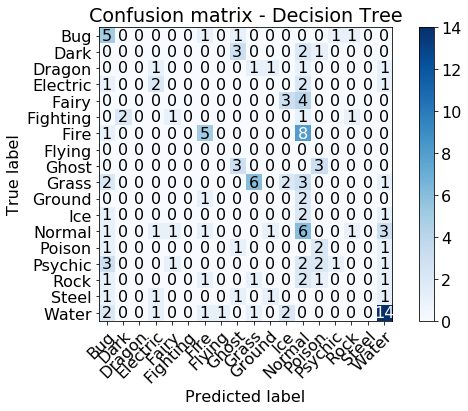

In [26]:
fig= plt.figure(figsize=(16,8))
com.plot_confusion_matrix(y_test, y_pred=pred_tree, classes=label_names,
                          title="Confusion matrix - Decision Tree")
plt.show()

In [23]:
print("[KNN] Selecionando modelos...")

grid_search = np.meshgrid(np.arange(1, 26, 2), # k
                          ['euclidean', 'manhattan', 'mahalanobis']) # distance metric
validation_list = []
validation_list_index = []
for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        k = grid_search[0][i,j]
        distance_metric = grid_search[1][i,j]   
        
        wrong_index_validation = y_validation != knn.predict_class(x=x_train_validation, y=y_train_validation,
                                                                   x_new=x_validation,
                                                                   k=k, distance_metric=distance_metric)
        validation_list.append(np.mean(wrong_index_validation))
        validation_list_index.append((i,j))
   
best_i, best_j = validation_list_index[np.argmin(validation_list)]   
best_k = grid_search[0][best_i, best_j]
best_distance_metric = grid_search[1][best_i, best_j]

print("[KNN] Melhor modelo encontrado: K=%d, 'distance_metric'=%s" % (best_k, best_distance_metric))

[KNN] Selecionando modelos...
[KNN] Melhor modelo encontrado: K=7, 'distance_metric'=mahalanobis


In [24]:
print("[KNN] Avaliando modelo...")
pred_knn = knn.predict_class(x_train, y_train, x_test, k=best_k, distance_metric=best_distance_metric)

wrong_index_test_knn = pred_knn != y_test
print("[KNN] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_knn)))

[KNN] Avaliando modelo...
[KNN] Taxa de erro no teste: 67.13%


Confusion matrix - KNN
[[5 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0]
 [1 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 1 0 2 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 1 1]
 [0 0 0 2 0 0 0 0 0 1 0 0 4 0 0 0 0 0]
 [0 2 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 4 0 0 5 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 9 0 0 3 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 3 0 0 8 0 0 0 0 2]
 [1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [2 0 0 0 1 0 0 0 0 2 1 0 3 0 1 0 0 0]
 [1 0 0 1 0 0 0 0 0 1 0 0 2 0 0 1 0 1]
 [0 1 0 0 0 0 0 0 0 0 1 0 2 0 0 1 0 0]
 [2 0 1 0 0 3 0 1 0 2 0 0 1 0 0 3 1 8]]


<Figure size 1152x576 with 0 Axes>

C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


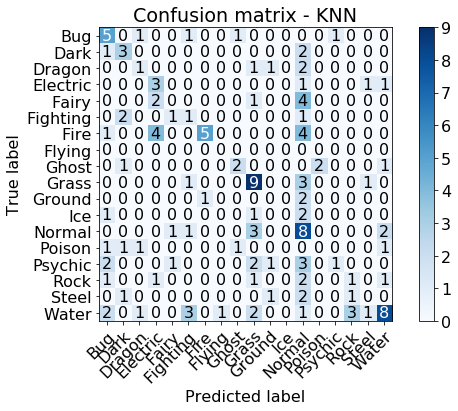

In [27]:
fig= plt.figure(figsize=(16,8))
com.plot_confusion_matrix(y_test, y_pred=pred_knn, classes=label_names,
                          title="Confusion matrix - KNN")
plt.show()